In [1]:
import tensorflow as tf
import random
import pandas as pd
import numpy
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import cv2
import math

Y = a*X^2 + b (Parabolas)

In [2]:
X = []
Y = []
for i in range(10):
    a = random.randint(2,100)
    X.append(a)
    Y.append(a**2 + 5)
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
print(X.iloc[0])
print(Y.iloc[0])

0    57
Name: 0, dtype: int64
0    3254
Name: 0, dtype: int64


In [303]:
inp = keras.Input(shape = (1,))
i = keras.layers.Dense(units=6,activation='tanh')(inp)
i = keras.layers.Dense(units=6,activation='tanh')(i)
i = keras.layers.Dense(units=6,activation='tanh')(i)
out = keras.layers.Dense(units=1)(i)
model = keras.Model(inputs = inp, outputs = out, name = 'parabola')
model.summary()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0045), loss='mae')

Model: "parabola"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_96 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ power_22 (Power)                │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_201 (Dense)               │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_202 (Dense)               │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

In [304]:
loss = model.fit(X,Y, batch_size=10,validation_data=(X,Y), epochs= 1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step - loss: 101.6906 - val_loss: 101.1577
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 101.1577 - val_loss: 100.6275
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 100.6275 - val_loss: 100.1000
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 100.1000 - val_loss: 99.5753
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 99.5753 - val_loss: 99.0535
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 99.0535 - val_loss: 98.5345
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 98.5345 - val_loss: 98.0184
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 98.0184 - val_loss: 97.5053
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 97.5053 - val_loss: 96.9952
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 96.9952 - val_loss: 96.4881
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 96.4881 - val_loss: 95.9841
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━

In [307]:
y = model.predict(pd.DataFrame([8]))
print(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[69.12425]]


SUM(X) = Y

In [21]:
X = []
Y = []

for i in range(1000):
    x = [random.uniform(-1000,1000) for j in range(10)]
    y = [x[0]+x[j] for j in range(1,len(x))]
    X.append(x)
    Y.append(y)
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
# X.head()
# Y.head()

In [31]:
inp = keras.Input(shape=(10,))
i = keras.layers.Dense(units=9,)(inp)
model = keras.Model(inputs=inp, outputs=i,name='sum')
model.summary()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0045), loss='mse')

Model: "sum"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99 (396.00 B)

 Trainable params: 99 (396.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
loss = model.fit(X,Y, batch_size=1000,epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0013
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0013
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0013
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0013
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0013
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0013
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0013
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0013
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0013
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0013
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0013
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0013
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0013
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0013
Epoch 16/500
1/1 ━━

In [40]:
print(model.predict(pd.DataFrame([0,1,1,1,1,1,1,1,1,1]).T))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[0.99963796 0.99997157 0.9999758  0.9548864  1.0000229  0.9999181
  0.9999866  1.0008395  0.99627095]]


2.2691e-04 or less is acceptable

EXP(X) = Y

In [46]:
X = []
Y = []
for i in range(5000):
    a = random.uniform(-5,5)
    X.append(a)
    Y.append(math.exp(a))
X = pd.DataFrame(X,columns=['X'])
Y = pd.DataFrame(Y,columns=['Y'])
print(X.iloc[0])
print(Y.iloc[0])

X    2.65183
Name: 0, dtype: float64
Y    14.179971
Name: 0, dtype: float64


TESTING SPACE 

In [78]:
X = []
Y = []
for i in range(50000):
    a = random.uniform(-10,10)
    X.append(a)
    Y.append(math.exp(a))
X = pd.DataFrame(X,columns=['X'])
Y = pd.DataFrame(Y,columns=['Y'])
print(X.iloc[0])
print(Y.iloc[0])

X    3.953337
Name: 0, dtype: float64
Y    52.108976
Name: 0, dtype: float64


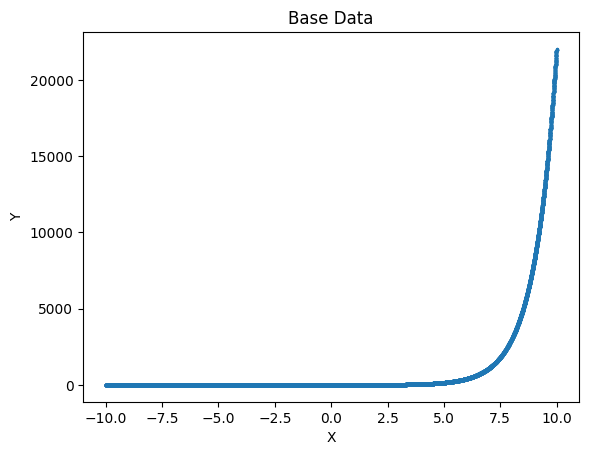

In [79]:
df = pd.concat([X,Y],axis=1)
df.head()
df.plot(kind='scatter',x='X',y='Y', s=2)
plt.title('Base Data')
# plt.show()
plt.savefig('C:/Projects/AI-learning/Neural Network/From-scratch/base_Data.png')
img = cv2.imread('C:/Projects/AI-learning/Neural Network/From-scratch/base_Data.png')
# cv2.imshow('image',img)
height, width, layers = img.shape
# print(df.shape)


In [71]:
inp = keras.Input(shape = (1,))
i = keras.layers.Dense(units=5,activation='tanh')(inp)
i = keras.layers.Dense(units=5,activation='tanh')(i)
i = keras.layers.Dense(units=5,activation='tanh')(i)
i = keras.layers.Dense(units=5,activation='tanh')(i)
i = keras.layers.Dense(units=5,activation='tanh')(i)
# i = keras.layers.Dense(units=1,activation='tanh')(i)
# i = keras.layers.Dense(units=5,activation='relu')(i)
# i = keras.layers.Dense(units=3,activation='relu')(i)
i = keras.layers.Dense(units=1)(i)
out = keras.layers.Dense(units=1)(i)
model = keras.Model(inputs = inp, outputs = out, name = 'Cube')
model.summary()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0045), loss='mse')

Model: "Cube"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 1)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138 (552.00 B)

 Trainable params: 138 (552.00 B)

 Non-trainable params: 0 (0.00 B)

In [80]:
err = []
time = []
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# video = cv2.VideoWriter('C:/Projects/AI-learning/Neural Network/From-scratch/Traning_steps_tannh.avi',fourcc,30,(width,height))
# er_vid = cv2.VideoWriter('C:/Projects/AI-learning/Neural Network/From-scratch/error_steps_tanh.avi',fourcc,30,(width,height))
for i in range(360):
    loss = model.fit(X,Y, batch_size=50000,validation_data=(X,Y), epochs= 15)
    print("STEP: ",i)
    y = pd.DataFrame(model.predict(X),columns=['y'])
    df = pd.concat([X,y],axis=1)
    # df.head()
    # os.system('clear')
    err.append(loss.history['loss'][-1])
    time.append(i)
    plt.scatter(time,err,s=1)
    plt.savefig('C:/Projects/AI-learning/Neural Network/From-scratch/error.jpg')
    # eri = cv2.imread('C:/Projects/AI-learning/Neural Network/From-scratch/error.jpg')
    # er_vid.write(eri)
    plt.clf()
    df.plot(kind='scatter',x='X',y='y',s = 1.5)
    plt.savefig('C:/Projects/AI-learning/Neural Network/From-scratch/training.jpg')
    # tri = cv2.imread('C:/Projects/AI-learning/Neural Network/From-scratch/training.jpg')
    # video.write(tri)
    plt.clf()
    # plt.title('Trained')
    # plt.show()
    # print(df.shape)
# video.release()
# er_vid.release()

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 10266439.0000 - val_loss: 10264785.0000
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 10264785.0000 - val_loss: 10263144.0000
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10263143.0000 - val_loss: 10261512.0000
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10261512.0000 - val_loss: 10259889.0000
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 10259889.0000 - val_loss: 10258274.0000
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 10258274.0000 - val_loss: 10256666.0000
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 10256666.0000 - val_loss: 10255064.0000
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 10255064.0000 - val_loss: 10253469.0000
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10253468.0000 - val_loss: 10251878.0000
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 10251878.0000 - val_loss: 10250292.0000
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━

c:\Users\arpit\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 9787827.0000 - val_loss: 9786189.0000
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 9786189.0000 - val_loss: 9784551.0000
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 9784551.0000 - val_loss: 9782913.0000
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 9782913.0000 - val_loss: 9781274.0000
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 9781274.0000 - val_loss: 9779635.0000
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 9779635.0000 - val_loss: 9777995.0000
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 9777995.0000 - val_loss: 9776356.0000
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 9776356.0000 - val_loss: 9774716.0000
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 9774716.0000 - val_loss: 9773076.0000
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 9773077.0000 - val_loss: 9771436.0000
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/ste

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [18]:
print(type(loss.history['loss'][-1]))

<class 'float'>


In [150]:
video.release()
er_vid.release()

In [74]:
y = model.predict(pd.DataFrame([10]))
print(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[139.77525]]
